**Exercise 2.1** Launch ```chap02.ipynb``` and run the code. There are a few short exercises embedded in the notebook that you might want to try.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)


The following lines below are from the notebook. It has been read, understood and rewritten for the sake of the short exercises.

In [2]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [3]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

(-0.6575000823289163,
 1.1575000078231097,
 -1.0478907761761622,
 1.0478907563079471)

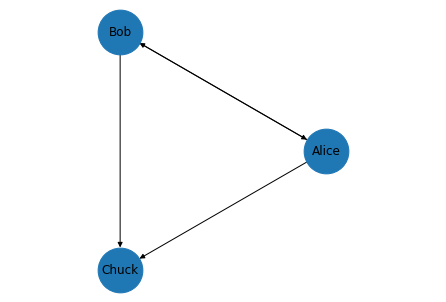

In [4]:
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')

**Exercise:**  Add another node and a few more edges and draw the graph again.

Solution:

(-1.2099999656079838,
 1.2099999815012372,
 -1.2099999516989168,
 1.2099999954103042)

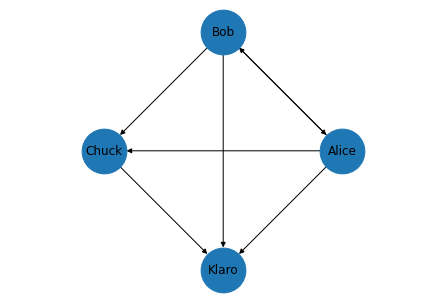

In [5]:
G.add_node('Klaro')
G.add_edge('Alice','Klaro')
G.add_edge('Chuck','Klaro')
G.add_edge('Bob','Klaro')

nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')

The following lines below are from the notebook. It has been read, understood and rewritten for the sake of the short exercises.

In [6]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

(-74, 43)

In [7]:
G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

NodeView(('Albany', 'Boston', 'NYC', 'Philly'))

In [8]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

In [9]:
G.add_edges_from(drive_times)
G.edges()

EdgeView([('Albany', 'Boston'), ('Albany', 'NYC'), ('Boston', 'NYC'), ('NYC', 'Philly')])

(-75.20000000000002, -70.8, 39.849999999999994, 43.15)

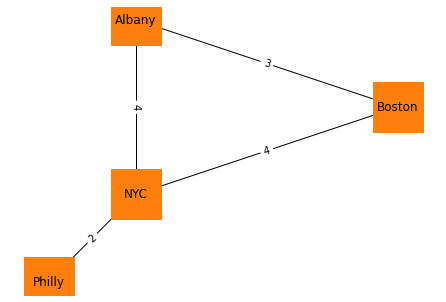

In [10]:
nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')

**Exercise:**  Add another city and at least one edge.

In [11]:
add_cities = dict(PH=(-70,43),
                  SG=(-72,43))
positions.update(add_cities)
add_edges = {('SG','NYC'):15,
             ('SG','PH'):3,
             ('PH','Boston'):2,
             ('SG','Boston'):2,
             ('SG','Albany'):4}
drive_times.update(add_edges)

(-75.25000000000001, -69.75, 39.849999999999994, 43.15)

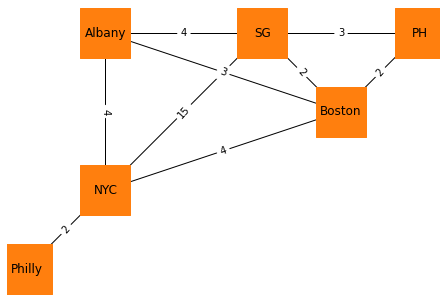

In [12]:
G = nx.Graph()
G.add_edges_from(drive_times)
G.add_nodes_from(positions)

nx.draw(G, positions,
        node_color='C1',
        node_shape='s',
        node_size=2500,
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, edge_labels=drive_times)

plt.axis('equal')

The following lines below are from the notebook. It has been read, understood and rewritten for the sake of the short exercises.

In [13]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

In [14]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

In [15]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

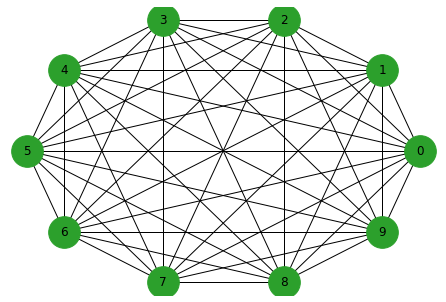

In [16]:
nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)

In [17]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

Solution:

If we notice the code ```all_pairs(nodes)```, if we reversed the condition $ i < j$ then the ordered pair $(x,y)$ will turn into $(y,x)$. Hence, to get a complete directed graph, we could modify the ```all_pairs(nodes)``` definition to include the ordered pair $(y,x)$ so that we could make it a symmetric directed graph.

In [18]:
def all_pairs_symmetric(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j:
                yield u, v

In [19]:
def make_directed_graph(n):
  G = nx.DiGraph()
  nodes = range(n)
  G.add_nodes_from(nodes)
  G.add_edges_from(all_pairs_symmetric(nodes))
  return G

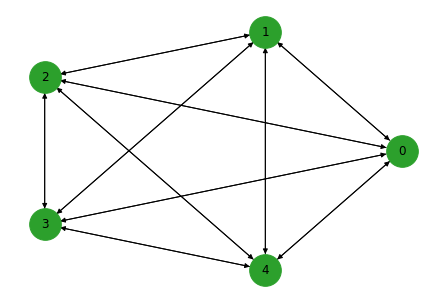

In [20]:
complete_directed = make_directed_graph(5)
nx.draw_circular(complete_directed,
                 node_color = 'C2',
                 node_size = 1000,
                 with_labels=True)

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

I have the initial impression that a connected directed graph is like what our previous result is; all pairs have a directed path  between them. Turns out, this is the definition of strong connectedness, according to this: https://mathworld.wolfram.com/ConnectedDigraph.html

In [21]:
def reachable_nodes_modified(G,start):
  seen = set()
  stack = [start]
  while stack:
    node = stack.pop()
    if node not in seen:
      seen.add(node)
      check_neighbors = set(G.neighbors(node)) - seen
      stack.extend(check_neighbors)
  return seen

In [22]:
def directed_graph_is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes_modified(G, start)
    return len(reachable) == len(G)

In [23]:
directed_graph_is_connected(complete_directed)

True